### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

### Instructions given in class: (11/07)
Steps to be followed:
1. read csv files
2. explore dataset
3. evaluation 
4. split 
5. scale
6. model
-GridSearchCV - best parameters
-train, test score

Proj 3 (If you need head start):
7. ensemble
8. dimension reduction - repeat step 4 to 7
9. Deep learning

In [20]:
%matplotlib notebook
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##  Dataset For Regression Task

In [2]:
Dataset = pd.read_csv('Twitter.data', header = None)  #Reading Regression Dataset

In [3]:
Dataset.info()
#Dataset.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
0     583250 non-null int64
1     583250 non-null int64
2     583250 non-null int64
3     583250 non-null int64
4     583250 non-null int64
5     583250 non-null int64
6     583250 non-null int64
7     583250 non-null int64
8     583250 non-null int64
9     583250 non-null int64
10    583250 non-null int64
11    583250 non-null int64
12    583250 non-null int64
13    583250 non-null int64
14    583250 non-null float64
15    583250 non-null float64
16    583250 non-null float64
17    583250 non-null float64
18    583250 non-null float64
19    583250 non-null float64
20    583250 non-null float64
21    583250 non-null float64
22    583250 non-null float64
23    583250 non-null float64
24    583250 non-null float64
25    583250 non-null float64
26    583250 non-null float64
27    583250 non-null float64
28    583250 non-null int64
29    583250 non-null int64
30    583250 non-null

In [4]:
Dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [5]:
#Dataset.columns
Dataset[77].unique().astype(int)  #This is Dependent variable

array([   0,    0,    2, ..., 4960, 4618, 2129])

In [19]:
#Dataset.isnull().values.any()    #No Missing values
Dataset.isnull().sum().sum()  

0

In [22]:
corr = Dataset.corr()    #calculate correlation matrix

<IPython.core.display.Javascript object>


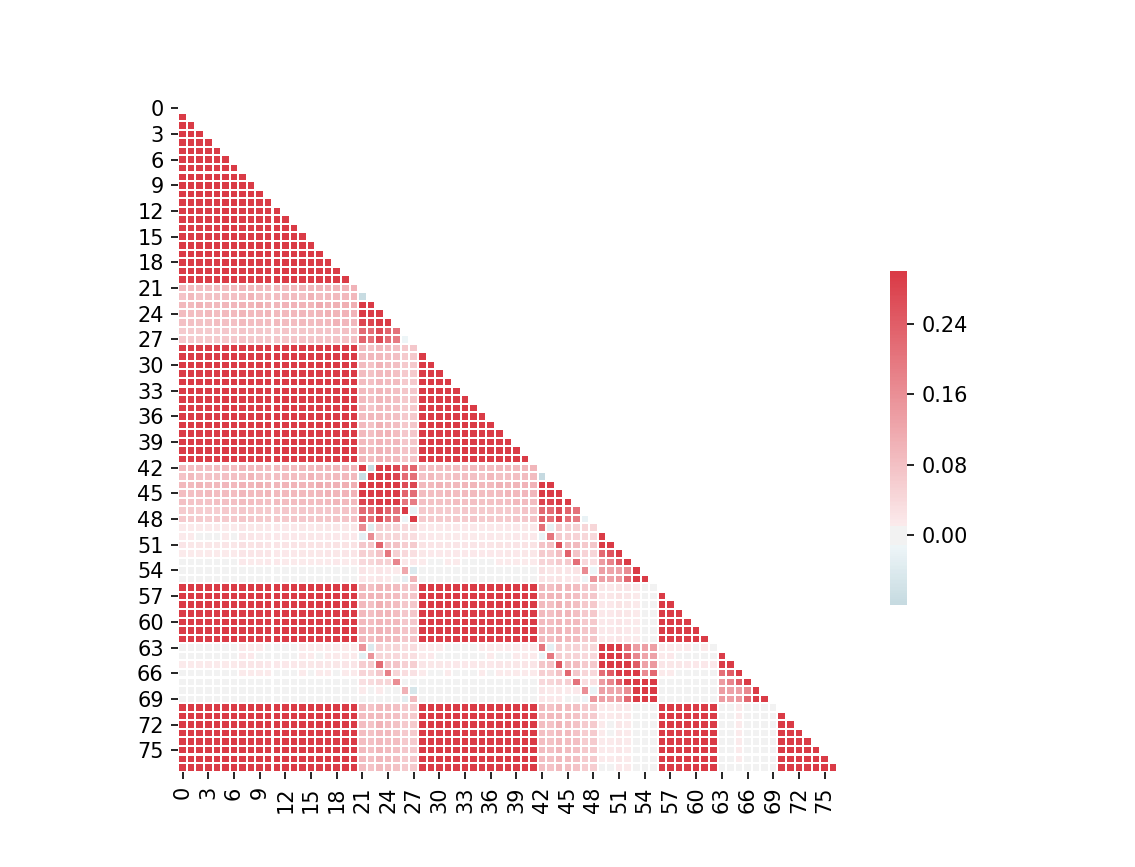

In [23]:
#Developing correlation plot

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
#Reading .names file
file = open("Twitter.names", "r")
for aline in file:
    #items = aline.split()
    print(aline)

1. Title of Database: Buzz prediction on Twitter





2. Sources:

   -- Creators : 

        FranÃ§ois Kawala (1,2) and 

        Ahlame Douzal (1) and 

        Eric Gaussier (1) and

        Eustache Diemert (2)



   -- Institutions : 

        (1) UniversitÃ© Joseph Fourier (Grenoble I)

            Laboratoire d'informatique de Grenoble (LIG)

        (2) BestofMedia Group



   -- Donor: BestofMedia (ediemert@bestofmedia.com)

   -- Date: May, 2013





3. Past Usage:

   -- References : 

        Predicting Buzz Magnitude in Social Media (in submission (ECML-PKDD 13))



   -- Predicted attribute : 

         Mean Number of active discussion (NAD). This attribute is a positive integer 

         that describe the popularity of the instance's topic. It is stored is 

         the rightmost column.



   -- Study results : 

        The results achieved are acceptable, nevertheless the unbalanced nature

        of this dataset leaves some room for improvement. The data may be sc

##  Dataset For Classification Task

In [11]:
Dataset_2 = pd.read_csv('Twitter-Absolute-Sigma-500.data', header = None)   #Reading Data For classification

In [12]:
Dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140707 entries, 0 to 140706
Data columns (total 78 columns):
0     140707 non-null int64
1     140707 non-null int64
2     140707 non-null int64
3     140707 non-null int64
4     140707 non-null int64
5     140707 non-null int64
6     140707 non-null int64
7     140707 non-null int64
8     140707 non-null int64
9     140707 non-null int64
10    140707 non-null int64
11    140707 non-null int64
12    140707 non-null int64
13    140707 non-null int64
14    140707 non-null float64
15    140707 non-null float64
16    140707 non-null float64
17    140707 non-null float64
18    140707 non-null float64
19    140707 non-null float64
20    140707 non-null float64
21    140707 non-null float64
22    140707 non-null float64
23    140707 non-null float64
24    140707 non-null float64
25    140707 non-null float64
26    140707 non-null float64
27    140707 non-null float64
28    140707 non-null int64
29    140707 non-null int64
30    140707 non-null

In [8]:
Dataset_2.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


In [10]:
#Dataset.columns
Dataset_2[77].unique().astype(int)   #Dependent variable

array([1, 0])

In [18]:
Dataset_2.isnull().sum().sum()    #No Missing values

0

In [9]:
#Reading names file
file = open("Twitter-Absolute-Sigma-500.names", "r")
for aline in file:
    #items = aline.split()
    print(aline)

1. Title of Database: Buzz prediction on Twitter - Absolute Labeling - Threshold Sigma equals 500 





2. Sources:

   -- Creators : 

        FranÃ§ois Kawala (1,2) and 

        Ahlame Douzal (1) and 

        Eric Gaussier (1) and

        Eustache Diemert (2)



   -- Institutions : 

        (1) UniversitÃ© Joseph Fourier (Grenoble I)

            Laboratoire d'informatique de Grenoble (LIG)

        (2) BestofMedia Group



   -- Donor: BestofMedia (ediemert@bestofmedia.com)

   -- Date: May, 2013





3. Past Usage:

   -- References : 

        Predicting Buzz Magnitude in Social Media (in submission (ECML-PKDD 13))



   -- Predicted attribute : 

        Buzz. This attribute is boolean: 1 meaning `buzz observed', 0 meaning 

        `no buzz observed'. It is stored is the rightmost column.



   -- Study results : 

        The results achieved indicates that the task is trivial. Indeed, 

        using random forest yields a F-1 score of around 0.90, when the data

        